In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, FunctionTransformer
import xgboost as xgb

train_df = pd.read_csv('data/train.csv')

In [2]:
label_feature = 'Danceability'
numerical_features = ['Energy', 'Loudness', 'Speechiness', 'Acousticness',
                      'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Stream',
                      'Views', 'Likes', 'Comments']

categorical_features = ['Album_type', 'Key', 'Licensed', 'official_video']

string_features = [
    'Track', 'Artist', 'Composer', 'Album', 'Title', 'Channel', 'Description'
]

# Define used features

In [3]:
from my_transformer import MyTransformer
import pandas as pd

# label
label_feature = 'Danceability'

# features
dont_transform_features = ['Energy', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence']
normal_transform_features = ['Tempo']
power_transform_features = ['Loudness', 'Duration_ms', 'Stream', 'Views', 'Likes', 'Comments']
categorical_features = ['Album_type', 'Key', 'Licensed', 'official_video']

# all features
features_columns = dont_transform_features + normal_transform_features + power_transform_features + categorical_features
label_column = label_feature

# import data
train_df = pd.read_csv('data/train.csv')[features_columns + [label_column]]
test_df = pd.read_csv('data/test.csv')[features_columns]
test_ids = pd.read_csv('data/test.csv')['id']

# init transformer
my_transformer = MyTransformer(
    all_features=features_columns,
    categorical_features=categorical_features,
    normal_transform_features=normal_transform_features,
    power_transform_features=power_transform_features,
    numerical_features=dont_transform_features + normal_transform_features + power_transform_features,
    label_column=label_column,
)

# transform dataset
train_X = my_transformer.features_fit_transform(train_df)
train_Y = my_transformer.label_fit_transform(train_df)
test_X = my_transformer.features_transform(test_df)

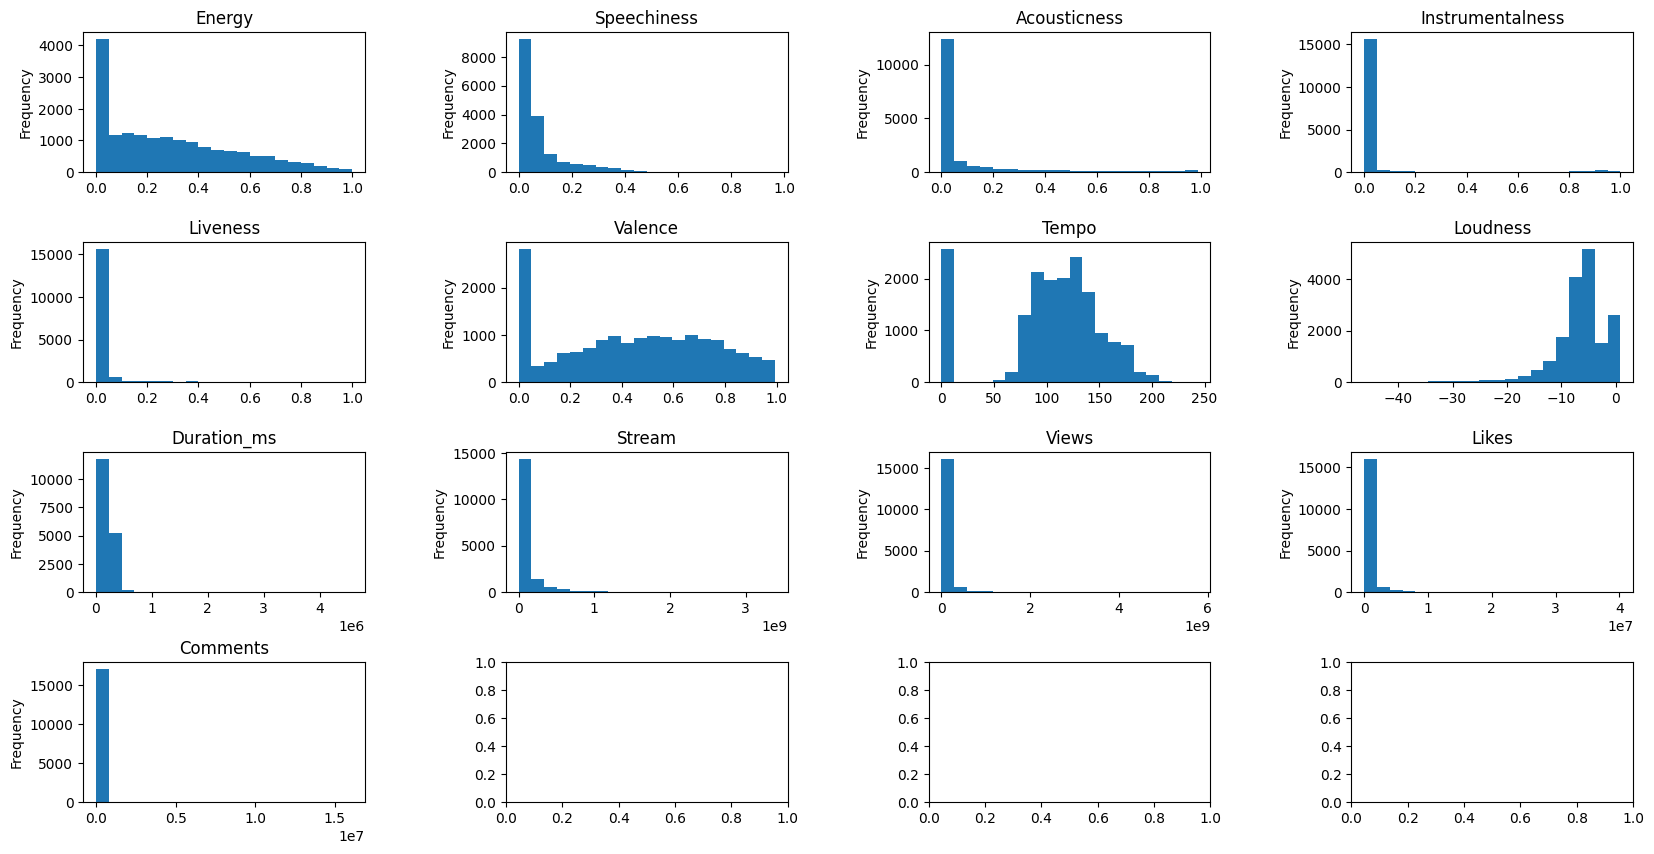

In [10]:
from utils import plot_distribution

plot_distribution(train_X, dont_transform_features + normal_transform_features + power_transform_features)

# preprocess features

In [5]:
X, Y = train_df.drop(columns=[label_column]), train_df[label_column]

# Define the parameter grid for grid search
param_grid = {
    'max_depth': [7],
    'learning_rate': [0.1],
    'n_estimators': [200],
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}

def custom_scorer(y_true, y_pred):
    y_pred = my_transformer.inverse_label_transform(y_pred)
    y_pred = np.clip(np.round(y_pred), 0, 9)
    y_true = my_transformer.inverse_label_transform(y_true)
    print(mean_absolute_error(y_true, y_pred))
    return -mean_absolute_error(y_true, y_pred)

# Create an instance of the HistGradientBoostingRegressor
model = xgb.XGBRegressor

# Perform grid search with cross-validation
scoring = make_scorer(custom_scorer)
grid_search = GridSearchCV(model(), param_grid, scoring=scoring, cv=5)
grid_search.fit(X, Y)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

# Print the best parameters and score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Create a new instance of HistGradientBoostingRegressor with the best parameters
trained_model = model(**best_params)

# Fit the best HistGradientBoostingRegressor on the entire dataset
trained_model = trained_model.fit(X, Y)

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/Ethan/Developer/Projects/College/大四下/機器學習/final/letdance/venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Ethan/Developer/Projects/College/大四下/機器學習/final/letdance/venv/lib/python3.11/site-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/Users/Ethan/Developer/Projects/College/大四下/機器學習/final/letdance/venv/lib/python3.11/site-packages/xgboost/sklearn.py", line 988, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/Ethan/Developer/Projects/College/大四下/機器學習/final/letdance/venv/lib/python3.11/site-packages/xgboost/sklearn.py", line 448, in _wrap_evaluation_matrices
    train_dmatrix = create_dmatrix(
                    ^^^^^^^^^^^^^^^
  File "/Users/Ethan/Developer/Projects/College/大四下/機器學習/final/letdance/venv/lib/python3.11/site-packages/xgboost/sklearn.py", line 908, in _create_dmatrix
    return DMatrix(**kwargs, nthread=self.n_jobs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/Ethan/Developer/Projects/College/大四下/機器學習/final/letdance/venv/lib/python3.11/site-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/Users/Ethan/Developer/Projects/College/大四下/機器學習/final/letdance/venv/lib/python3.11/site-packages/xgboost/core.py", line 743, in __init__
    handle, feature_names, feature_types = dispatch_data_backend(
                                           ^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/Ethan/Developer/Projects/College/大四下/機器學習/final/letdance/venv/lib/python3.11/site-packages/xgboost/data.py", line 970, in dispatch_data_backend
    return _from_pandas_df(data, enable_categorical, missing, threads,
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/Ethan/Developer/Projects/College/大四下/機器學習/final/letdance/venv/lib/python3.11/site-packages/xgboost/data.py", line 417, in _from_pandas_df
    data, feature_names, feature_types = _transform_pandas_df(
                                         ^^^^^^^^^^^^^^^^^^^^^
  File "/Users/Ethan/Developer/Projects/College/大四下/機器學習/final/letdance/venv/lib/python3.11/site-packages/xgboost/data.py", line 391, in _transform_pandas_df
    _invalid_dataframe_dtype(data)
  File "/Users/Ethan/Developer/Projects/College/大四下/機器學習/final/letdance/venv/lib/python3.11/site-packages/xgboost/data.py", line 283, in _invalid_dataframe_dtype
    raise ValueError(msg)
ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:Album_type: object, Licensed: object, official_video: object


In [ ]:
test_df = pd.read_csv('data/test.csv')
ids = test_df['id']
test_df = test_df[features_columns]

# Transform the test data
test_df[normal_transform_features] = normal_transformer.transform(test_df[normal_transform_features])
test_df[power_transform_features] = power_transformer.transform(test_df[power_transform_features])
test_df = pd.get_dummies(test_df, columns=categorical_features)

# clamp values
for feature in numerical_features:
    min_value = train_df[feature].min()
    max_value = train_df[feature].max()

    test_df.loc[test_df[feature] < min_value, feature] = 0
    test_df.loc[test_df[feature] > max_value, feature] = 0

# Make predictions on the test set
test_predictions = trained_model.predict(test_df)
test_predictions = label_transformer.inverse_transform([test_predictions])
test_predictions = np.clip(np.round(test_predictions), 0, 9)
test_predictions = test_predictions.astype(int).reshape(-1)

# Prepare the submission dataframe
submission_df = pd.DataFrame({'id': ids, 'Danceability': test_predictions})

# Save the submission to a CSV file
submission_df.to_csv('submission.csv', index=False)